#**PROJECT NAME** : **Credit Card Fraud Detection**

* Building a machine learning model to identify fraudulent credit card
transactions.
* Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

# Libraries for ML Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

##Loading Dataset

In [2]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/CodSoft/Project 4/creditcard.csv.zip')

##Understanding of Data

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(f'No. of Columns: {df.shape[1]}')
print(f'No. of Rows: {df.shape[0]}')
df.shape

No. of Columns: 31
No. of Rows: 284807


(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##Data Cleaning

In [ ]:
# Checking Null Values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Checking Duplicates
duplicates = df[df.duplicated()].head(5)
duplicates

duplicate_ = df.groupby(['Amount', 'Time']).filter(lambda x: len(x)>1).head(5)
duplicate_

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0


Data is clean, no duplicates, no missing values.

##**Exploratory Data Analysis**

In [ ]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

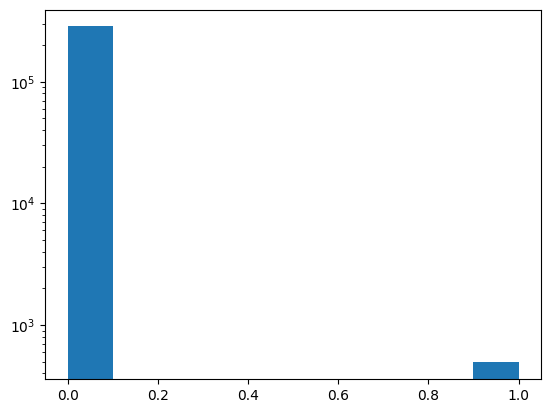

In [ ]:
plt.hist(df['Class'])
plt.yscale('log')
plt.show()

In [ ]:
df.groupby(['Class'])['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* As per above output, clearly data is imbalanced.
* Data is in PCA transformed format, so no EDA is required.
* We will directly load the model and evaluate the model and as we know the data is imbalanced, So we will work on both before and after imbalanced data, let's understand the differance between before and after working on Imbalance data.

# **Predictive Aanlysis (Imbalance Data)**

### Data Preprocessing

Feature Engineering

In [ ]:
# Select and define features(x) and target variable(y)
x = df.iloc[:,:-1]
y = df['Class']

In [ ]:
# Scaling & standardize the features # transforming
scaler = StandardScaler()
x = scaler.fit_transform(x)

Data Spliting

In [ ]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 123)

In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (227845, 30)
x_test:  (56962, 30)
y_train:  (227845,)
y_test:  (56962,)


### Model Building & Evaluation

Logistic Regression

In [ ]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [ ]:
# Model Evaluation
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, lr_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, lr_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test, lr_pred))

The performance evaluation of Linear Regression is below:  

Accuracy Score:  0.9989642217618764 

Confusion Matrix:  
 [[56833    14]
 [   45    70]] 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

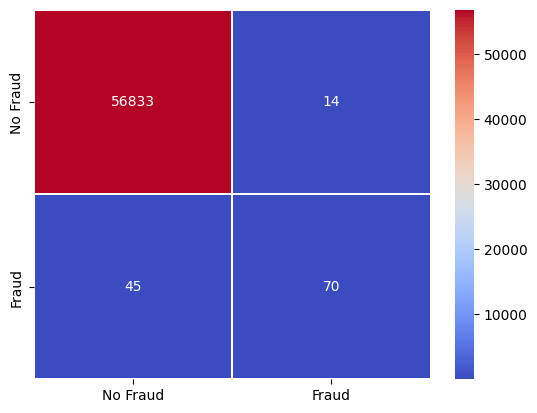

In [ ]:
conf_mtrx = confusion_matrix(y_test, lr_pred)
labels = ['No Fraud', 'Fraud']
sns.heatmap(conf_mtrx, annot= True, fmt='d', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)

Random Forest Classification Model

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
random_forest_pred = rfc.predict(x_test)

In [ ]:
# Model Evaluation
print('The performance evaluation of Random Forest Classification is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, random_forest_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, random_forest_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test, random_forest_pred))

The performance evaluation of Random Forest Classification is below:  

Accuracy Score:  0.9995259997893332 

Confusion Matrix:  
 [[56843     4]
 [   23    92]] 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.96      0.80      0.87       115

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



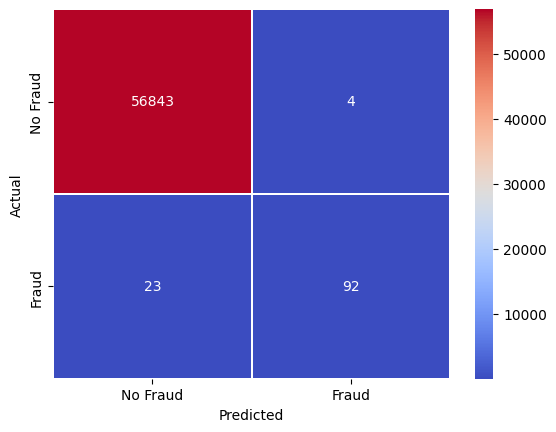

In [ ]:
rfc_conf_mtrx = confusion_matrix(y_test, random_forest_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(rfc_conf_mtrx, annot= True, fmt='d', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* From the Above precision, Recall and F1-Score we are confirmed that our data is not overfit or underfit
* Accuracy is getting 1 that we can uderstand because of large legit transations the results are showing as 1
* we are consantrating on Fraud Transactions

Kneighbors Classification Model

In [ ]:
# KNeighbors Classifier
kneib = KNeighborsClassifier(n_neighbors= 4)
kneib.fit(x_train, y_train)
kneib_pred = kneib.predict(x_test)

In [ ]:
# Model Evaluation
print('The performance evaluation of KNeighbors Classification Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, kneib_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, kneib_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test, kneib_pred))

The performance evaluation of KNeighbors Classification Model is below:  

Accuracy Score:  0.9994733330992591 

Confusion Matrix:  
 [[56842     5]
 [   25    90]] 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.95      0.78      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



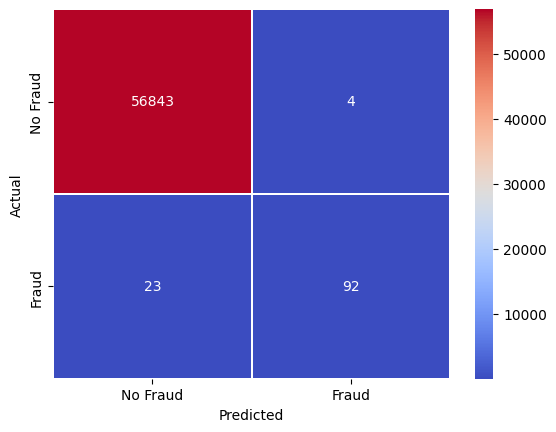

In [ ]:
kneib_conf_mtrx = confusion_matrix(y_test, random_forest_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(kneib_conf_mtrx, annot= True, fmt='d', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model performs exceptionally well in identifying "No Fraud" instances,achieving perfect precision and recall. However, for the "Fraud" class, there is room for improvement, especially in terms of recall, as it correctly identifies only 78% of actual fraud cases.

.                   

# **Predictive Aanlysis (With Resampling Techniques)**

As the DATA is IMBALANCE we can use 2 methods either we can add the thresholds or we can use RASAMPLING TECHNIQUE.

## Under-Sampling Technique

### Data Preprocessing

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* Data is not balanced as we see 0 legit transactions are 284315, where as fraud transations are 492.
* So we are using the Resampling Technique.

Under-sampling the Majority Class:
* Randomly remove instances from majority class to balance the class distribution.
* We should be careful, not to remove too much data, as it may result information loss.
* Create 2 datasets based on classification with equal rows.  

In [3]:
# Create Datasets with equal rows
df_0 = df[df['Class'] == 0].sample(n= 492, random_state= 42)
df_1 = df[df['Class'] == 1].sample(n= 492, random_state= 42)

print(f' Fraud Shape{df_1.shape}\n No Fraud Shape{df_0.shape}')

 Fraud Shape(492, 31)
 No Fraud Shape(492, 31)


In [4]:
# Merge 2 Datasets
merge_df = pd.concat([df_0, df_1], ignore_index= True)
print(f'Merge Dataset Shape {merge_df.shape}')

Merge Dataset Shape (984, 31)


Feature Engineering

In [5]:
# Select and define features(x) and target variable(y)
x_bal = merge_df.iloc[:,:-1]
y_bal = merge_df['Class']

In [6]:
# Scaling & standardize the features # transforming
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)

Data Spliting

In [7]:
# Splitting the dataset into training and testing parts
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bal, y_bal, test_size= 0.2, random_state= 123)

In [8]:
print('x_train_b: ', x_train_b.shape)
print('x_test_b: ', x_test_b.shape)
print('y_train_b: ', y_train_b.shape)
print('y_test_b: ', y_test_b.shape)

x_train_b:  (787, 30)
x_test_b:  (197, 30)
y_train_b:  (787,)
y_test_b:  (197,)


### Model Building & Evaluation

Logistic Regression Model

In [9]:
# Logistic Regression
bal_lr = LogisticRegression()
bal_lr.fit(x_train_b, y_train_b)
bal_lr_pred = bal_lr.predict(x_test_b)

In [10]:
# Model Evaluation
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_b, bal_lr_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_b, bal_lr_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_b, bal_lr_pred))

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.949238578680203 

Confusion Matrix:  
 [[106   3]
 [  7  81]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



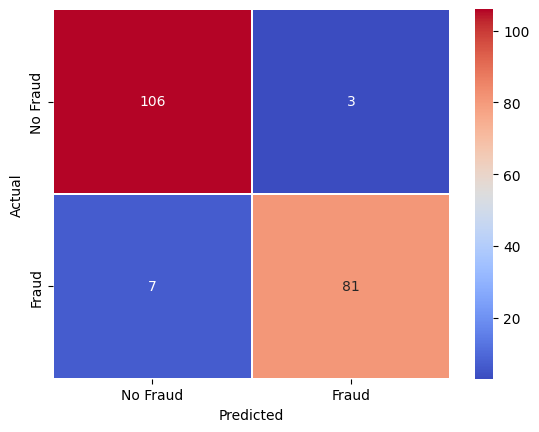

In [11]:
bal_lrgr_conf_mtrx = confusion_matrix(y_test_b, bal_lr_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(bal_lrgr_conf_mtrx, annot= True, fmt='d', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classification Model

In [12]:
# Random Forest Classifier
bal_rfc = RandomForestClassifier()
bal_rfc.fit(x_train_b, y_train_b)
bal_rfc_pred = bal_rfc.predict(x_test_b)

In [13]:
# Model Evaluation
print('The performance evaluation of Random Forest Classification Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_b, bal_rfc_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_b, bal_rfc_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_b, bal_rfc_pred))

The performance evaluation of Random Forest Classification Model is below:  

Accuracy Score:  0.9390862944162437 

Confusion Matrix:  
 [[105   4]
 [  8  80]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       109
           1       0.95      0.91      0.93        88

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



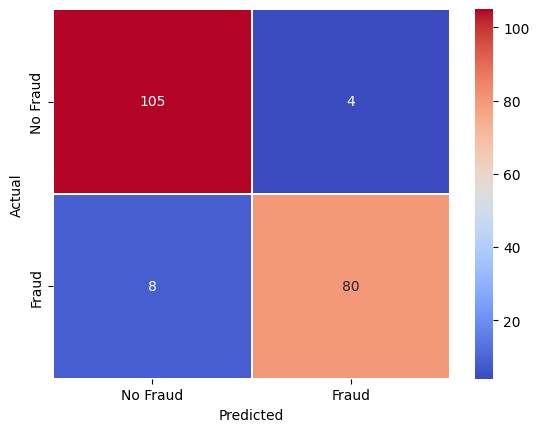

In [14]:
bal_rfc_conf_mtrx = confusion_matrix(y_test_b, bal_rfc_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(bal_rfc_conf_mtrx, annot= True, fmt= 'd', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNeighbors Classification Model

In [19]:
# KNeighbors Classifier
bal_kneib = KNeighborsClassifier()
bal_kneib.fit(x_train_b, y_train_b)
bal_kneib_pred = bal_kneib.predict(x_test_b)

In [20]:
# Model Evaluation
print('The performance evaluation of KNeighbors Classification Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_b, bal_kneib_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_b, bal_kneib_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_b, bal_kneib_pred))

The performance evaluation of KNeighbors Classification Model is below:  

Accuracy Score:  0.9187817258883249 

Confusion Matrix:  
 [[107   2]
 [ 14  74]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       109
           1       0.97      0.84      0.90        88

    accuracy                           0.92       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.92      0.92      0.92       197



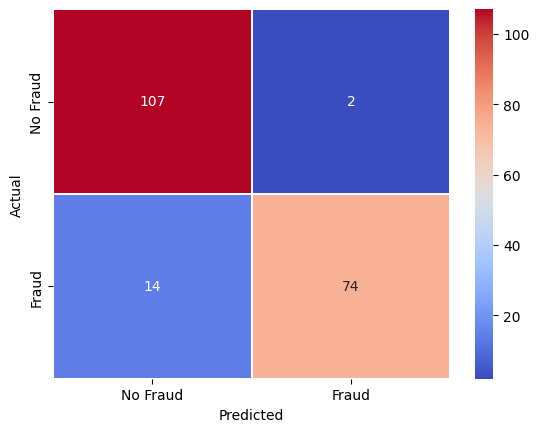

In [17]:
bal_kneib_conf_mtrx = confusion_matrix(y_test_b, bal_kneib_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(bal_kneib_conf_mtrx, annot= True, fmt= 'd', cmap='coolwarm', linewidths= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Summary:

* Both models (Logistic Regression, Random Forest and K-Neighbors) perform exceptionally well, achieving high precision, recall, and F1-scores for both classes.

* The models show balanced performance in correctly identifying instances of both classes (0 and 1), as indicated by the similarity in precision and recall values.

* The F1-scores for both classes are also high, suggesting a good balance between precision and recall.

.

##Over-Sampling Technique

### Data Preprocessing

In [32]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* Data is not balanced as we see 0 legit transactions are 284315, where as fraud transations are 492.
* So we are using the Resampling Technique.

In [36]:
# Import Libraries
from sklearn.utils import resample

In [43]:
# Two Dataframe of Majority and Minority Class
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Over-Sampling Minority Class
df_minority = resample(df_minority, n_samples= 284315, replace= True, random_state= 42) # df_minor = df[df['Class'] == 1].sample(n= 284315, replace= True, random_state= 42)
print(f' Fraud Shape{df_minority.shape}\n No Fraud Shape{df_majority.shape}')

 Fraud Shape(284315, 31)
 No Fraud Shape(284315, 31)


In [44]:
# Merge 2 Dtaframe
df_oversampled = pd.concat([df_majority, df_minority], ignore_index= True)
print(f'Merge Dataset Shape {df_oversampled.shape}')

Merge Dataset Shape (568630, 31)


Feature Engineering

In [45]:
# Select and define features(x) and target variable(y)
x_oversamp = df_oversampled.iloc[:,:-1]
y_oversamp = df_oversampled['Class']

In [46]:
# Scaling & standardize the features # transforming
scaler = StandardScaler()
x_oversamp = scaler.fit_transform(x_oversamp)

Data Spliting

In [48]:
# Splitting the dataset into training and testing parts
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_oversamp, y_oversamp, test_size= 0.2, random_state= 123)

In [49]:
print('x_train_os: ', x_train_os.shape)
print('x_test_os: ', x_test_os.shape)
print('y_train_os: ', y_train_os.shape)
print('y_test_os: ', y_test_os.shape)

x_train_os:  (454904, 30)
x_test_os:  (113726, 30)
y_train_os:  (454904,)
y_test_os:  (113726,)


### Model Building & Evaluation

Logistic Regression Model

In [51]:
# Logistic Regression
oversamp_lr = LogisticRegression()
oversamp_lr.fit(x_train_os, y_train_os)
oversamp_lr_pred = oversamp_lr.predict(x_test_os)

In [52]:
# Model Evaluation
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_os, oversamp_lr_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_os, oversamp_lr_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_os, oversamp_lr_pred))

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.9495541916536236 

Confusion Matrix:  
 [[55533  1235]
 [ 4502 52456]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56768
           1       0.98      0.92      0.95     56958

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



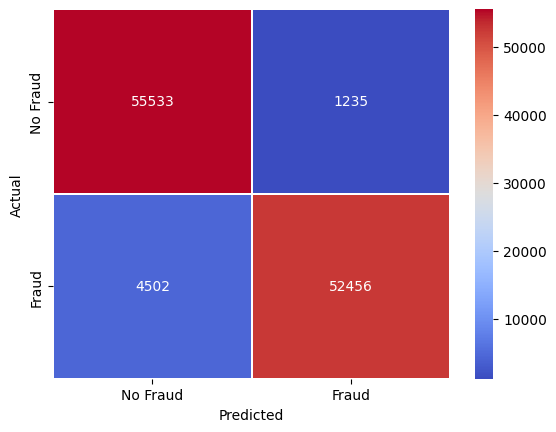

In [53]:
oversamp_lrgr_conf_mtrx = confusion_matrix(y_test_os, oversamp_lr_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(oversamp_lrgr_conf_mtrx, annot= True, fmt='d', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classification Model

In [54]:
# Random Forest Classifier
oversamp_rfc = RandomForestClassifier()
oversamp_rfc.fit(x_train_os, y_train_os)
oversamp_rfc_pred = oversamp_rfc.predict(x_test_os)

In [55]:
# Model Evaluation
print('The performance evaluation of Random Forest Classification Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_os, oversamp_rfc_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_os, oversamp_rfc_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_os, oversamp_rfc_pred))

The performance evaluation of Random Forest Classification Model is below:  

Accuracy Score:  0.9999208624237201 

Confusion Matrix:  
 [[56759     9]
 [    0 56958]] 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56768
           1       1.00      1.00      1.00     56958

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



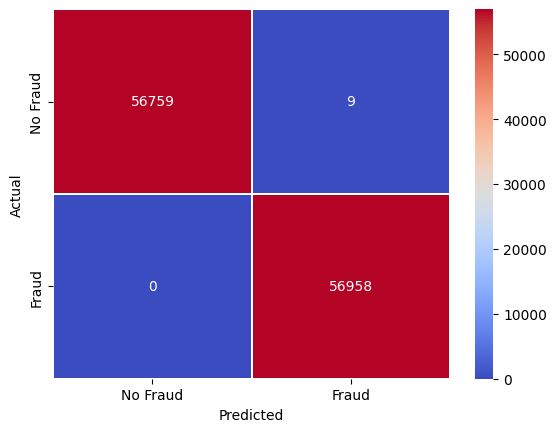

In [56]:
oversamp_rfc_conf_mtrx = confusion_matrix(y_test_os, oversamp_rfc_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(oversamp_rfc_conf_mtrx, annot= True, fmt= 'd', cmap= 'coolwarm', linewidth= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNeighbors Classification Model

In [57]:
# KNeighbors Classifier
oversamp_kneib = KNeighborsClassifier()
oversamp_kneib.fit(x_train_os, y_train_os)
oversamp_kneib_pred = bal_kneib.predict(x_test_os)

In [58]:
# Model Evaluation
print('The performance evaluation of KNeighbors Classification Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test_os, oversamp_kneib_pred), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test_os, oversamp_kneib_pred), '\n')
print('Classification Report: ', '\n', classification_report(y_test_os, oversamp_kneib_pred))

The performance evaluation of KNeighbors Classification Model is below:  

Accuracy Score:  0.9299544519283189 

Confusion Matrix:  
 [[55533  1235]
 [ 6731 50227]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     56768
           1       0.98      0.88      0.93     56958

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



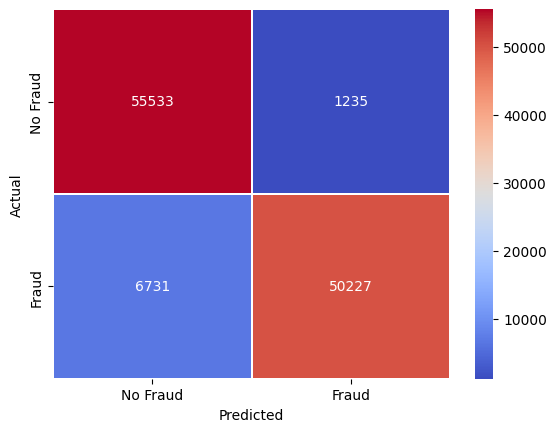

In [59]:
oversamp_kneib_conf_mtrx = confusion_matrix(y_test_os, oversamp_kneib_pred)
labels = ['No Fraud', 'Fraud']

sns.heatmap(oversamp_kneib_conf_mtrx, annot= True, fmt= 'd', cmap='coolwarm', linewidths= 0.2, xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()